In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import hdbscan
from pandas.plotting import parallel_coordinates
#from sklearn.manifold import TSNE
#import umap
#import numba
import prince
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split

To be used to install python library if not already installed

In [4]:
%%bash -x
pip install --user scikit-learn

+ pip install --user scikit-learn
thinc 6.10.3 has requirement cymem<1.32.0,>=1.30.0, but you'll have cymem 2.0.2 which is incompatible.
thinc 6.10.3 has requirement preshed<2.0.0,>=1.0.0, but you'll have preshed 3.0.2 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
devices = pd.read_csv('F:\\rev\\rev-devices.csv')
notifications = pd.read_csv('F:\\rev\\rev-notifications.csv')
transactions = pd.read_csv('F:\\rev\\rev-transactions.csv')
users = pd.read_csv('F:\\rev\\rev-users.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [199]:
users.head(5)

,user_id,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_created
0,user_0,1989,PL,Gdansk,1,STANDARD,1.0,1.0,3,0,0,2018-01-13
1,user_1,1975,GB,London,0,STANDARD,NaN,NaN,21,0,0,2018-01-29
2,user_2,1987,PL,Poznań,0,STANDARD,0.0,0.0,21,0,0,2018-01-18
3,user_3,1994,FR,Paris,0,STANDARD,1.0,0.0,0,0,0,2018-01-15
4,user_4,1985,GB,Beckenham,0,STANDARD,NaN,NaN,2,0,0,2018-01-11


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 12 columns):
user_id                                     19430 non-null object
birth_year                                  19430 non-null int64
country                                     19430 non-null object
city                                        19430 non-null object
created_date                                19430 non-null object
user_settings_crypto_unlocked               19430 non-null int64
plan                                        19430 non-null object
attributes_notifications_marketing_push     12820 non-null float64
attributes_notifications_marketing_email    12820 non-null float64
num_contacts                                19430 non-null int64
num_referrals                               19430 non-null int64
num_successful_referrals                    19430 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


In [181]:
users.describe()

,birth_year,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,users_created_year,users_created_month
count,19430.000000,19430.000000,12820.000000,12820.000000,19430.000000,19430.0,19430.0,19430.000000,19430.000000
mean,1983.648636,0.181009,0.947582,0.895944,17.887699,0.0,0.0,2018.003191,7.185435
std,11.368871,0.385035,0.222877,0.305345,46.506438,0.0,0.0,0.056400,3.417753
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2018.000000,1.000000
25%,1978.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,2018.000000,4.000000
50%,1986.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0,2018.000000,7.000000
75%,1992.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0,2018.000000,10.000000
max,2001.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0,2019.000000,12.000000


In [5]:
transactions.head(1)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03 03:34:21.784487


## 1) Initial Data Analysis... todo

In [104]:
print(users.columns, '\n', transactions.columns, '\n', devices.columns, '\n', notifications.columns)

Index(['user_id', 'country', 'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'user_created', 'users_created_year', 'users_created_month',
       'generations', 'brand'],
      dtype='object') 
 Index(['transaction_id', 'transactions_type', 'amount_usd',
       'ea_cardholderpresence', 'direction', 'user_id', 'transaction_created',
       'transactions_created_year', 'transactions_created_month'],
      dtype='object') 
 Index(['brand', 'user_id'], dtype='object') 
 Index(['reason', 'channel', 'status', 'user_id', 'notif_created'], dtype='object')


In [6]:
# Drop columns which will not be used
users = users.drop(columns=['city', 'num_referrals', 'num_successful_referrals'])
transactions = transactions.drop(columns=['transactions_currency','ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country'])

In [7]:
# Handle Dates
users['user_created']= pd.to_datetime(users['created_date']).dt.date
users = users.drop(columns=['created_date'])

transactions['transaction_created']= pd.to_datetime(transactions['created_date']).dt.date
transactions = transactions.drop(columns=['created_date'])

notifications['notif_created']= pd.to_datetime(notifications['created_date']).dt.date
notifications = notifications.drop(columns=['created_date'])

users['users_created_year'] = pd.to_datetime(users['user_created']).dt.year
users['users_created_month'] = pd.to_datetime(users['user_created']).dt.month

transactions['transactions_created_year'] = pd.to_datetime(transactions['transaction_created']).dt.year
transactions['transactions_created_month'] = pd.to_datetime(transactions['transaction_created']).dt.month

Clean User data

In [8]:
def binning(col, cut_points, labels=None, minmax=False):
    #Define min and max values:
    if minmax:
        minval = col.min()
        maxval = col.max()

    #create list by adding min and max to cut_points
    try:
        break_points = [minval] + cut_points + [maxval]
    except UnboundLocalError:
        break_points = cut_points

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

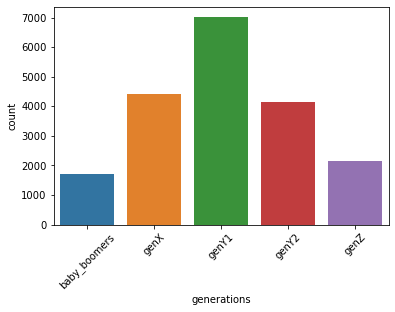

In [9]:
'''
Bin users to various generations
Baby Boomers: 1944 to 1964
Gen X: 1965 - 1979
Gen Y or Millennials: 1980 and 1994
Gen Y.1 = 1980-1990
Gen Y.2 = 1990-1994
Gen Z: 1995 and 2015
'''
#Binning age:
cut_points = [0,1965,1980,1990,1995,2100]
labels = ['baby_boomers','genX','genY1','genY2', 'genZ']
users['generations'] = binning(users['birth_year'], cut_points, labels)
users = users.drop(columns='birth_year')

sns.countplot(x='generations', data=users)
plt.xticks(rotation=45)


The genrations follow typical normal distribution

In [10]:
# merge user data with devices data
print(len(users))
users = pd.merge(users, devices, on='user_id')
print(len(users))
users.head(2)

19430
19430


,user_id,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,user_created,users_created_year,users_created_month,generations,brand
0,user_0,PL,1,STANDARD,1.0,1.0,3,2018-01-13,2018,1,genY1,Apple
1,user_1,GB,0,STANDARD,NaN,NaN,21,2018-01-29,2018,1,genX,Apple


# Plot on map TODO user spread vs engaged user spread?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

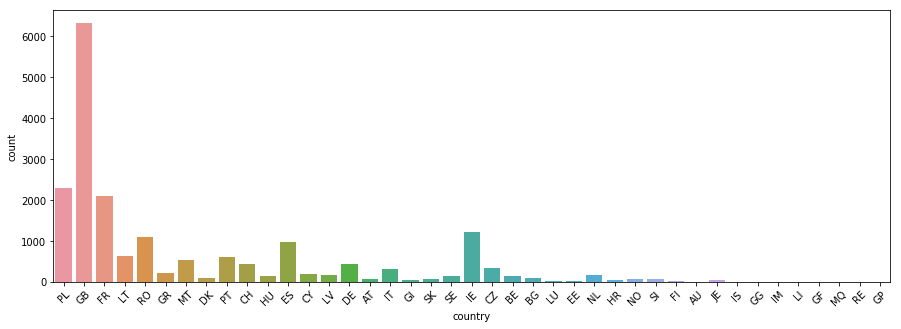

In [245]:
sns.countplot(x='country', data=users)
plt.xticks(rotation=45)

In [11]:
# Only completed transactions are considered
print(len(transactions))
transactions = transactions[transactions['transactions_state']=='COMPLETED']
transactions = transactions.drop(columns='transactions_state')
print(len(transactions))
transactions.head(2)

2740075
2407968


,transaction_id,transactions_type,amount_usd,ea_cardholderpresence,direction,user_id,transaction_created,transactions_created_year,transactions_created_month
0,transaction_0,TRANSFER,4.55,NaN,OUTBOUND,user_898,2018-04-03,2018,4
1,transaction_1,CARD_PAYMENT,15.50,FALSE,OUTBOUND,user_1652,2019-03-19,2019,3


In [12]:
ut = pd.merge(users, transactions, on='user_id')
ut.head(2)

,user_id,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,user_created,users_created_year,users_created_month,generations,brand,transaction_id,transactions_type,amount_usd,ea_cardholderpresence,direction,transaction_created,transactions_created_year,transactions_created_month
0,user_0,PL,1,STANDARD,1.0,1.0,3,2018-01-13,2018,1,genY1,Apple,transaction_27901,EXCHANGE,2.12,NaN,OUTBOUND,2018-06-19,2018,6
1,user_0,PL,1,STANDARD,1.0,1.0,3,2018-01-13,2018,1,genY1,Apple,transaction_89006,EXCHANGE,27.90,NaN,OUTBOUND,2018-06-25,2018,6


Quality check the merged data

In [190]:
print(len(users), len(transactions), len(ut))
print(sum(transactions.amount_usd)-sum(ut.amount_usd))

19430 2740075 2740075
-0.4666748046875


In [103]:
overlapping_min = max(ut.user_created)
overlapping_max = max(ut.transaction_created)
print('we have', (overlapping_max - overlapping_min).days, 'days of transaction overlapping between all users from', 
      overlapping_min, 'to', overlapping_max)
max_date = pd.Timestamp(max(ut.transaction_created)).date()
min_date = pd.Timestamp(min(ut.user_created)).date()
print('we have', (max_date - min_date).days, 'days of transaction data from', min_date, 'to', max_date)

we have 132 days of transaction overlapping between all users from 2019-01-03 to 2019-05-15
we have 499 days of transaction data from 2018-01-01 to 2019-05-15


In [283]:
# TODO

Various ways of interpreting the column 'direction' in transactions table<br>
- INBOUND (inter country transaction) and OUTBOUNd (intra country transaction)
- INBOUND (money received which doesn't mean user involvement) and OUTBOUND (money sent which signifies user involvement)
- INBOUND (money received when requested by the user or put from the bank or something similar which mean user involvement) and OUTBOUND (money sent which signifies user involvement). This interpretation is considered while analysing the data

In [284]:
# handle notifications data
print(len(notifications))
notifications = notifications[notifications['status']=='SENT']
notifications = notifications.drop(columns='status')
print(len(notifications))
notifications.head(2)

121813
89477


,reason,channel,user_id,notif_created
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,user_7086,2018-12-02
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,user_6598,2018-12-01


## 2) LTV - cohort analysis

heatmat of transacted amount (in hundreds of thousands)


[]

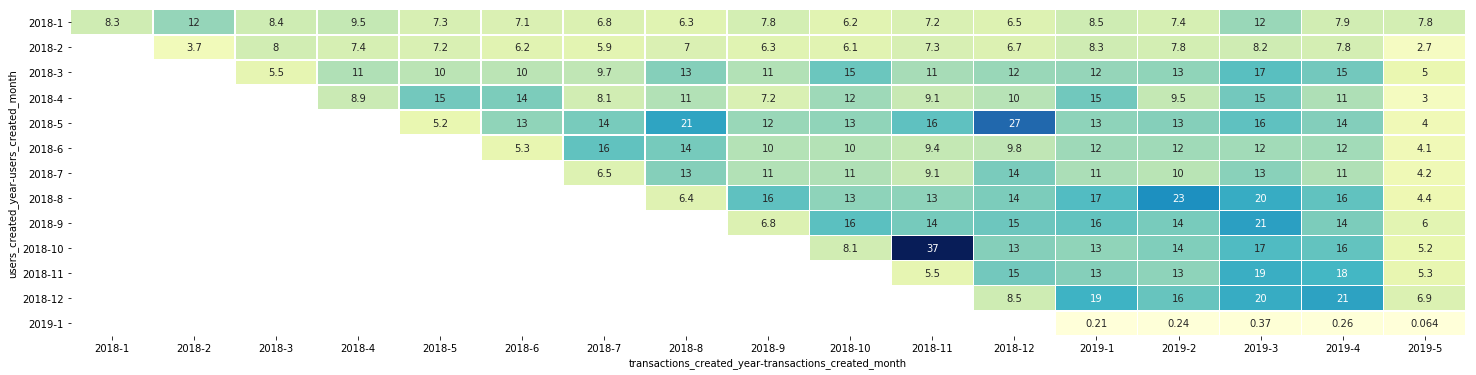

In [242]:
amount_transactions = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], [ut.transactions_created_year, ut.transactions_created_month], values=ut['amount_usd'], aggfunc='sum'))

print('heatmat of transacted amount (in hundreds of thousands)')

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(amount_transactions/100000, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()

Q: why some specific months showed high transaction? Is it because of outliers or because of some campaign?

heatmat of unique users who transacted (in hundreds)


[]

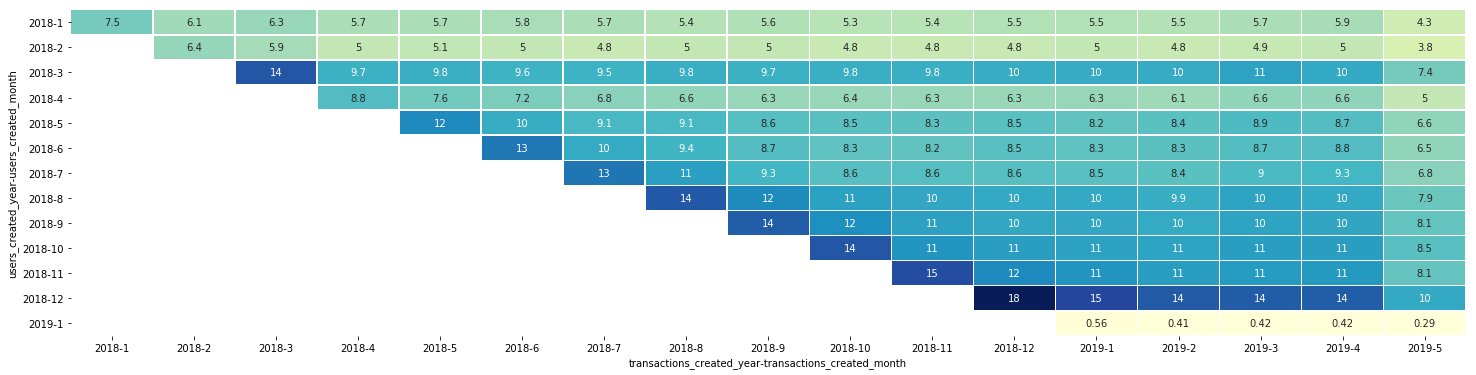

In [243]:
num_users_total = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], [ut.transactions_created_year, ut.transactions_created_month], values=ut['user_id'], aggfunc=pd.Series.nunique, margins=True))
num_users = num_users_total.drop(columns='All')
num_users = num_users.drop([['All','']])

print('heatmat of unique users who transacted (in hundreds)')

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(num_users/100, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


tells that new users users are more likely to make a transaction

LTV defined by amount of transactions (in thousands) per user


[]

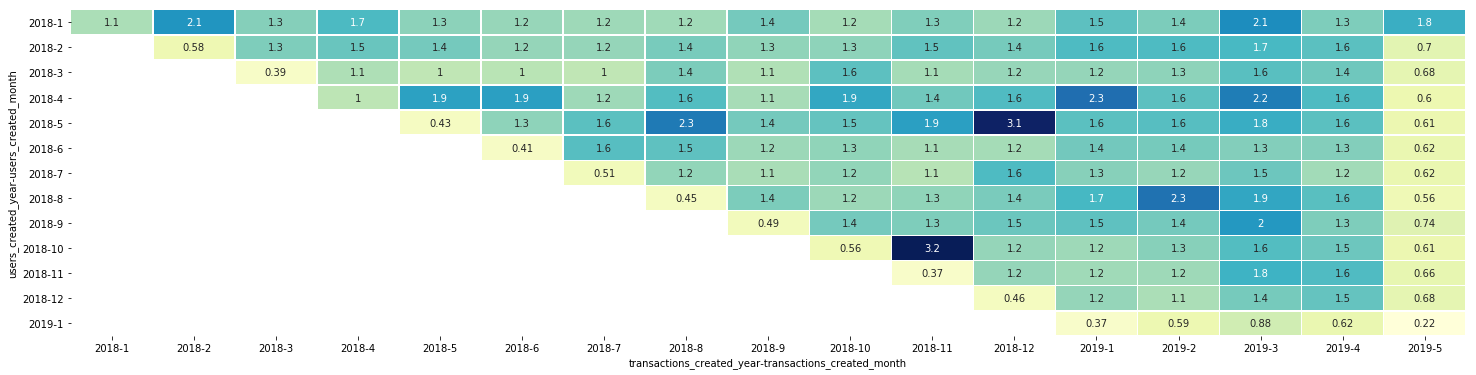

In [244]:
# LTV defined by amount of transactions per user

print('LTV defined by amount of transactions (in thousands) per user')
ltv = amount_transactions.div(num_users, level=None, fill_value=None)/1000

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(ltv, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


The heatmap is similar to what we saw with the heatmap of amount_transactions

Now let's check if the amount of transactions increase with increased num of users

C:\Users\bijno\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


[]

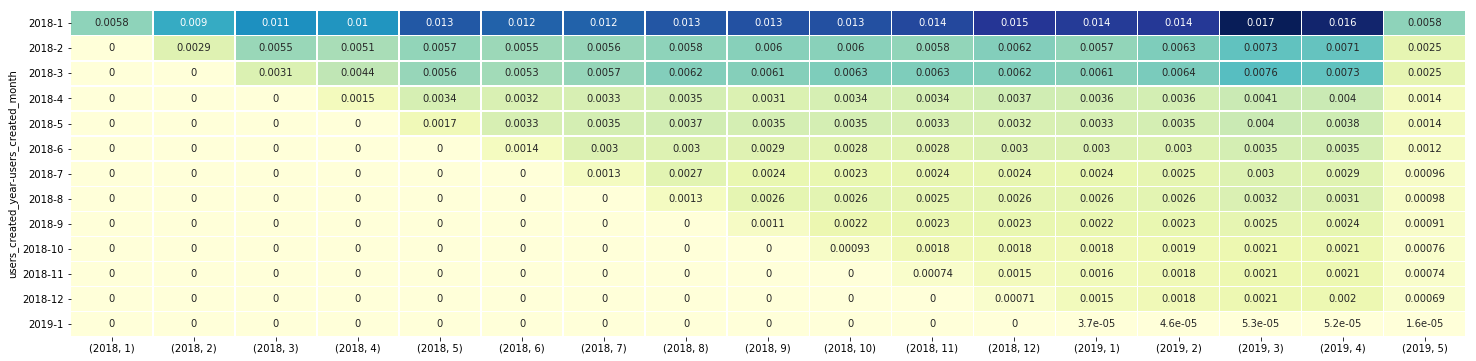

In [52]:
num_transactions = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], [ut.transactions_created_year, ut.transactions_created_month]))

merged_crosstab = num_transactions.merge(pd.DataFrame(num_users_total['All'].cumsum()), how='outer', left_index=True, right_index=True)

#let's normalize it
merged_crosstab = merged_crosstab.iloc[:,:].div(merged_crosstab.All, axis=0)

merged_crosstab = merged_crosstab.drop(columns=['All'])
merged_crosstab = merged_crosstab.drop([['All', '']])

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(merged_crosstab/1000, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


with increased num of users the number of transactions should be increased, but there seems to be a downfall of num of transactions per user with time

## 3) User Activity Funne

In [91]:
print('Total num users =', users.user_id.nunique(), '\nNum of users who ever transacted =', ut.user_id.nunique(), '\nNum of users who never transacted =', users.user_id.nunique()-ut.user_id.nunique())

Total num users = 19430 
Num of users who ever transacted = 18766 
Num of users who never transacted = 664


[]

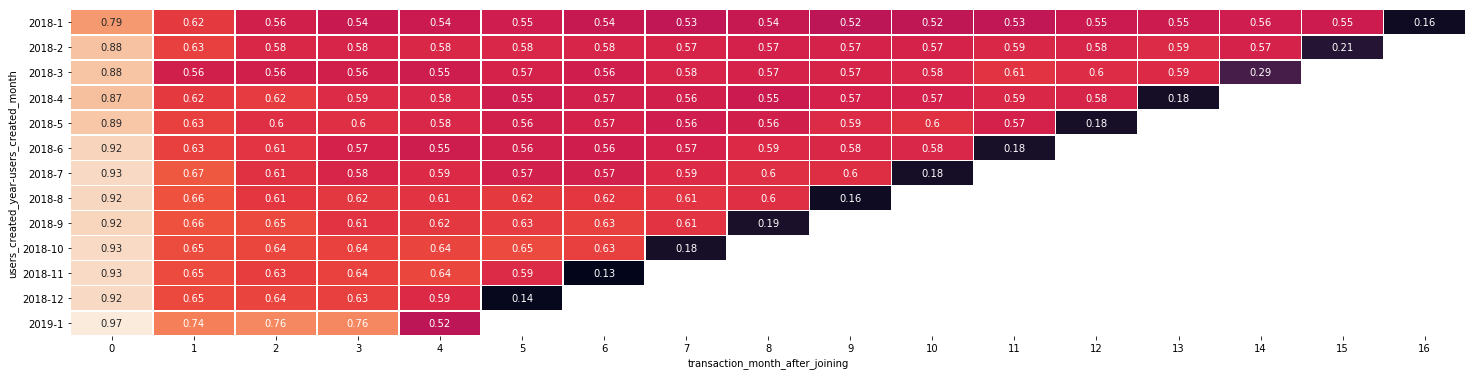

In [17]:
ut['transaction_day_after_joining'] = pd.DatetimeIndex(ut.created_date_y)-pd.DatetimeIndex(ut.created_date_x)
ut['transaction_month_after_joining'] = ((pd.DatetimeIndex(ut.created_date_y)-pd.DatetimeIndex(ut.created_date_x))/30).days

transacted_users_from_month_of_joining = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], ut['transaction_month_after_joining'], values=ut['user_id'], aggfunc=pd.Series.nunique, margins=True))

#let's normalize it
transacted_users_from_month_of_joining = transacted_users_from_month_of_joining.iloc[:,:].div(transacted_users_from_month_of_joining.All, axis=0)
transacted_users_from_month_of_joining = transacted_users_from_month_of_joining.drop(columns=['All'])
transacted_users_from_month_of_joining = transacted_users_from_month_of_joining.drop([['All','']])

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(transacted_users_from_month_of_joining, annot=True, cbar=False, linewidths=.5, ax=ax).plot()


num of users which tend to transact in their first month of joining are ~90% which drops down to 60% in second, 3rd and 4th months

## 4) User session_interval evaluation using ANOVA

session_interval = average time spent between two transactions

To understand the time difference between various users, let's carry out ANOVA. As num of transaction by various users are not same, we can say that num of samples in each group i.e. users are not equal thus we're facing Class Imbalance problem

In [18]:
def get_anova_df(ut):
    ut_sorted = ut.sort_values(['user_id', 'transaction_created'], ascending=[True, True]).reset_index(drop=True)
    anova_df = ut_sorted[['user_id', 'transaction_created', 'amount_usd']]

    anova_df['user_id_shift'] = anova_df['user_id'].shift(1) # not necessary, will be faster
    anova_df['transaction_created_shift'] = anova_df['transaction_created'].shift(1)

    anova_df['time_diff'] = np.where(anova_df['user_id_shift']==anova_df['user_id'], (anova_df['transaction_created']-anova_df['transaction_created_shift']).dt.days, 0)

    return anova_df

# Change iterrows (slow) TODO
def get_anova_data_list(anova_df):
    prev_usrid = None
    user_list = list()
    i = 0

    for index, rows in anova_df.iterrows():
        usrid = rows.user_id

        if usrid==prev_usrid:
            user_list[i-1].append(rows.time_diff)
        else:
            user_list.append(list())
            i += 1
        prev_usrid = usrid
    return user_list

def add_dead_users(user_list, users):
    # Handle users who have only one transaction, in that case the sub-list will be empty. Append that list with a value of zero
    for i in user_list:
        if len(i)==0:
            i.append(-1)
    # handle users who are not in transactions table
    list_to_extend = (len(users)-len(user_list))
    user_list.extend([[-1]]*list_to_extend)
    return user_list
    
# Quality check
def quality_check_anova(user_list):
    wrong_list = []
    for i in user_list:
        if len(i)==0:
            wrong_list.append(i)
    return wrong_list

In [19]:
# Run anova
anova_df = get_anova_df(ut)

user_list = get_anova_data_list(anova_df)

user_list = add_dead_users(user_list, users)

print(quality_check_anova(user_list))

f_val, p_val = stats.f_oneway(*user_list)
print(p_val, f_val)

C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

the above p-value means that the difference between some of the means is statistically significant, which tells that the users transact in different manners. <br>
We can also say that some users will be more engaged than others. Next is to define the metric for engagement

## 5) Define engagement metric

#### Reasoning behind selection of the engagement metric:
Business -> consider transaction volume, as with increase in transaction volume i.e. amount, customers' increased trust could be inferred. Transaction amount of the completed transactions <br>
Normalize -> use currency convertor on the transaction amount <br>
Remove noise -> take average of last n num of days (n is yet to be decided)

In [24]:
anova_total = anova_df[['user_id', 'time_diff']].describe()
print(anova_total)
print('=> total mean of the time difference (between two transactions) is', anova_total.loc['mean'].values[0], 'days')
print()

anova_within = anova_df[['user_id', 'time_diff']].groupby('user_id').mean().describe()
print(anova_within)
print('=> mean within groups of time difference (between two transactions) is', anova_within.loc['mean'].values[0], 'days')
n = int(anova_within.loc['mean'].values[0])

          time_diff
count  2.740075e+06
mean   1.471094e+00
std    8.221566e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    4.830000e+02
=> total mean of the time difference (between two transactions) is 1.4710936744432177 days

          time_diff
count  18766.000000
mean       5.231427
std        9.268738
min        0.000000
25%        0.980589
50%        2.448096
75%        5.600000
max      205.000000
=> mean within groups of time difference (between two transactions) is 5.23142735601429 days


For the volume, various metrics that are considered are as follows:<br>
L1 metric -> people who used it it last one day, or use it regularly everyday <br>
L7 metric -> people who used at least once in last 7 days <br>
L30 metric -> people who use it at least once a month <br>
we'll focus on L5 metric first (mean from the above table) and see results<br>
Note: taking the help of the above table we could also use the median (2.448 ~= 2.5 days) and consider L2.5 metric <br>

our engagement metric will be seen as: <br>
=> engagement = (total transaction amount in last 5 days)/5/(currency convertor to convert the amount to EUR) <br>
Since in the transaction table, the columns amount_usd already have the currency normalized, we'll use the engagement metric as:<br>
=> engagement = (total transaction amount in last 5 days)/5 <br>


Assumption: take 500 days of transaction data to define engagement. The same can be used while building pipelines

In [25]:
# create a column in ut as list_location which will be transaction_created - min_date
ut['list_location'] = (ut.transaction_created-min_date).dt.days

ut_comp = ut
len(ut_comp)

2407968

1) get the total transaction amount for each user for each day from Jan 1, 2018 (get_transaction_crosstab method)<br>
2) take sum of last n days transacted amount at user level (remove_noise method)<br>
3) scalarize the amount between 0 to 1 (scalarize_data method)<br>
4) check the number of users engaged for all 500 days (num_engaged_days_users method)

# change scalarize data *100 TODO

In [32]:
def get_transaction_crosstab(ut_comp):
    data = ut_comp[['user_id', 'user_created', 'list_location', 'amount_usd']]
    data2 = pd.DataFrame(pd.crosstab(data.user_id, data.list_location, values=data['amount_usd'], aggfunc='sum', margins=True))
    # has only 18k users, append the rest as well
    data2 = data2.drop(columns='All')

    try:
        data2 = data2.drop(columns=0)
    except KeyError:
        pass
    try:
        data2 = data2.drop(columns=500)
    except KeyError:
        pass

    # delete the row
    data2 = data2.drop('All')

    data2 = data2.fillna(0)
    return data2

# quality check the data
def get_data_min_max(data):
    dataset_min = min(data.min())
    dataset_max = max(data.max())
    #print(dataset_min)
    #print(dataset_max)
    return dataset_min, dataset_max

def remove_noise(df, n=5):
    df_cumsum = df.cumsum(axis=1) 
    df_cumsum2 = df_cumsum.shift(periods=n,axis=1).fillna(0)#,fill_value=0)
    chk = df_cumsum-df_cumsum2
    for i in range(1,n-1):
        chk[i] = df[i]
    return chk

def scalarize_data(dataset):
    dataset_min = min(dataset.min())
    dataset_max = max(dataset.max())
    dataNorm=((dataset-dataset_min)/(dataset_max-dataset_min))
    return dataNorm

def num_engaged_users(scalar_data, val):
    engaged_users = []
    for column in scalar_data:
        engaged_users.append(len(scalar_data[(scalar_data[column]>val)]))#.count())
    tot = sum(engaged_users)
    print('Num users*days considered engaged with threshold', val, ':', tot)#.count())
    return engaged_users
    
def num_engaged_days_users(scalar_data):
    for val in range(0,10,1):
        i = 0
        for column in scalar_data:
            if scalar_data[column].max()>val/10:
                i += 1
        print('threshold=', val/10, 'Num days where there''s engagement:',i)
        num_engaged_users(scalar_data, val/10)
        i = 0
    for column in scalar_data:
        if scalar_data[column].max()>0.05:
            i += 1
    print('threshold=', 0.05, 'Num days where there''s engagement:', i)
    num_engaged_users(scalar_data, 0.5)


In [27]:
data = get_transaction_crosstab(ut_comp)
print(get_data_min_max(data))

scalar_data = scalarize_data(remove_noise(data, n))
print(get_data_min_max(scalar_data))

num_engaged_days_users(scalar_data)

(621881.2500000001, 0.0)
(1.0, 0.0)
threshold= 0.0 Num days where theres engagement: 499
Num users*days considered engaged thusly: 1835156
threshold= 0.1 Num days where theres engagement: 166
Num users*days considered engaged thusly: 230
threshold= 0.2 Num days where theres engagement: 68
Num users*days considered engaged thusly: 78
threshold= 0.3 Num days where theres engagement: 33
Num users*days considered engaged thusly: 33
threshold= 0.4 Num days where theres engagement: 14
Num users*days considered engaged thusly: 14
threshold= 0.5 Num days where theres engagement: 5
Num users*days considered engaged thusly: 5
threshold= 0.6 Num days where theres engagement: 4
Num users*days considered engaged thusly: 4
threshold= 0.7 Num days where theres engagement: 4
Num users*days considered engaged thusly: 4
threshold= 0.8 Num days where theres engagement: 4
Num users*days considered engaged thusly: 4
threshold= 0.9 Num days where theres engagement: 4
Num users*days considered engaged thusly

using Pareto, let's say the users with:<br> 
transactions_nD>=0.2 are engaged; and that have <br>
transactions_nD<0.2 are not engaged

out of 18k*500 users*time, there's <100 times engagement with this method. This shows that we have considered outliers as well, let's remove them

#### remove outliers using z-score

In [29]:
z = np.abs(stats.zscore(data))
threshold = 3 # with 4 num of data points increase by ~1k
data_rm_out = data[(z < threshold).all(axis=1)]
data_rm_out.describe()

[[0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 3.26712579 ... 0.02441935 0.01021022 0.01162713]
 ...
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]]


list_location,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
count,11740.0,11740.0,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,...,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.0
mean,0.0,0.0,0.014841,0.010395,0.013101,0.011667,0.019141,0.021688,0.039174,0.050629,...,6.062186,8.934344,2.370525,5.267618,5.845261,3.500282,0.651519,0.028711,0.003008,0.0
std,0.0,0.0,0.752916,0.416246,0.700029,0.980473,0.858604,0.928854,1.463209,2.103456,...,30.633655,63.171425,20.540035,32.757577,38.048017,25.470485,12.374188,0.878453,0.244249,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,50.000000,21.700000,50.000000,105.000000,56.170000,59.270000,90.210000,144.680000,...,456.590000,1821.280000,514.830000,638.740000,723.570000,556.730000,860.000000,59.570000,25.530000,0.0


In [30]:
scalar_data_rm_o = scalarize_data(remove_noise(data_rm_out, n=n))

print(get_data_min_max(scalar_data))

num_engaged_days_users(scalar_data_rm_o)

(0.0, 1.0)
threshold= 0.0 Num days where theres engagement: 497
Num users*days considered engaged thusly: 813795
threshold= 0.1 Num days where theres engagement: 427
Num users*days considered engaged thusly: 32894
threshold= 0.2 Num days where theres engagement: 348
Num users*days considered engaged thusly: 5407
threshold= 0.3 Num days where theres engagement: 242
Num users*days considered engaged thusly: 1402
threshold= 0.4 Num days where theres engagement: 151
Num users*days considered engaged thusly: 405
threshold= 0.5 Num days where theres engagement: 95
Num users*days considered engaged thusly: 146
threshold= 0.6 Num days where theres engagement: 48
Num users*days considered engaged thusly: 54
threshold= 0.7 Num days where theres engagement: 29
Num users*days considered engaged thusly: 29
threshold= 0.8 Num days where theres engagement: 15
Num users*days considered engaged thusly: 15
threshold= 0.9 Num days where theres engagement: 10
Num users*days considered engaged thusly: 10
t

Num users*days considered engaged thusly: 32894
Num users*days considered engaged thusly: 5407
Num users*days considered engaged thusly: 1402
Num users*days considered engaged thusly: 405
Num users*days considered engaged thusly: 146
Num users*days considered engaged thusly: 54
Num users*days considered engaged thusly: 29
Num users*days considered engaged thusly: 15
Num users*days considered engaged thusly: 10


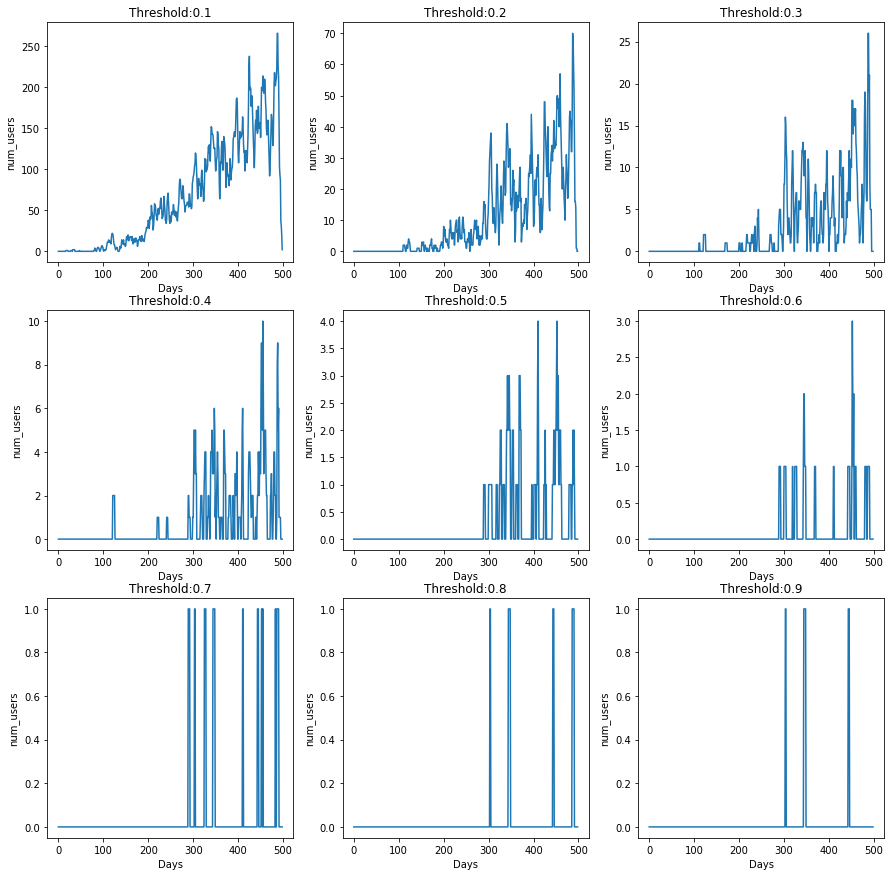

In [31]:
i = 0.1
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for ax in axs.flat:
    ax.plot(num_engaged_users(scalar_data_rm_o, i))
    ax.set_xlabel('Days')
    ax.set_ylabel('num_users')
    ax.set_title('Threshold:' + str(round(i, 2)))
    i += 0.1


With time more users are onboarded and thus we have more users towards the end to make any transactions. No doubt, the above graph shows that the num of engaged users increases with time. Had this not been the case, we would be looking into the causes!

Num users*days considered engaged with threshold 0.2 : 5407


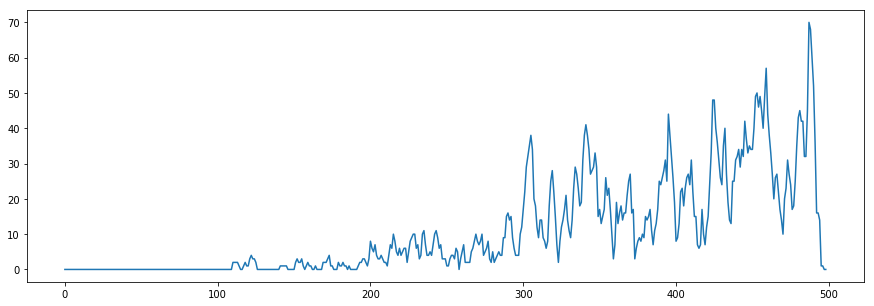

In [33]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(num_engaged_users(scalar_data_rm_o, 0.2))


TODO: the definition of engagement change with time?

## 6) User Clusters

I prefer density based clustering, as it doesn't require num of clusters and is shape independent, which works well in high dimensional space.<br> The only hyper-parameter to be handled is the min num of points in a cluster. <br> It also gives probability of assining a data point to a cluster. Since not all points are assigned to a cluster

KeyboardInterrupt: 

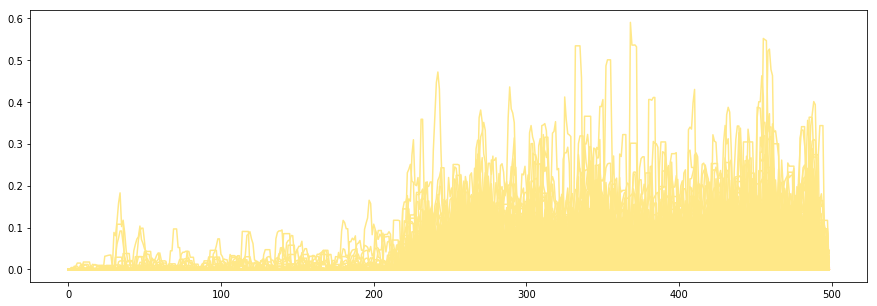

In [67]:
# Parallel coordinates data for all the users
scalar_data_rm_o['default'] = 0
pc = parallel_coordinates(scalar_data_rm_o, 'default', color=('#FFE888'))

In [103]:
# Make clusters
def hdbscan_clusters(hdbscan_data, met, cluster_size=100, var=10, rnd=0):
    clusterer = hdbscan.HDBSCAN(metric=met, min_cluster_size=cluster_size)
    #clusterer = hdbscan.HDBSCAN(metric='manhattan',min_cluster_size=min_cluster_size)
    #clusterer.fit(hdbscan_data.iloc[:, -(var+rnd):-rnd]) # take random columns
    clusterer.fit(hdbscan_data.iloc[:, -var:]) # take random columns
    return clusterer.labels_.max()+1, clusterer.labels_, clusterer.probabilities_

# https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0144059&type=printable
mets = 'canberra'
# mets: ['dice', 'jaccard', 'kulsinski', 'manhattan', 'matching', 'rogerstanimoto', 'sokalmichener', 'sokalsneath']

var = 50
cluster_size = 50
rnd = 0

num_clusters, labels, probabs = hdbscan_clusters(scalar_data_rm_o.drop(columns='default'), mets, cluster_size, var)
#if n>2:
print(mets, 'gives total num of clusters:', n)
print('Cluster frequency')
print(stats.itemfreq(labels))

canberra gives total num of clusters: 9
Cluster frequency
[[  -1 3895]
 [   0  478]
 [   1 5540]
 [   2 1827]]


C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


-1 are the outliers, which couldn't fit well to any group. Let's now view the clusters

In [120]:
var = 25
num_clusters, labels, probabs = hdbscan_clusters(scalar_data_rm_o.drop(columns='default'), mets, cluster_size=100, var=var)
#if n>2:
print(mets, 'gives total num of clusters:', num_clusters)
print('Cluster frequency')
print(stats.itemfreq(labels))

canberra gives total num of clusters: 9
Cluster frequency
[[  -1 4413]
 [   0 4373]
 [   1 2954]]


C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


In [146]:
4373/7327

0.5968336290432646

60-40 distribution. Thus, no class imbalance

In [121]:
cluster = pd.DataFrame()
cluster = cluster.reindex(scalar_data_rm_o.index)
cluster['groups'] = labels.tolist()

# Let's plot for only 50 days
par_cor = pd.concat([scalar_data_rm_o.drop(columns='default').iloc[:, -var:], cluster['groups']], axis=1)

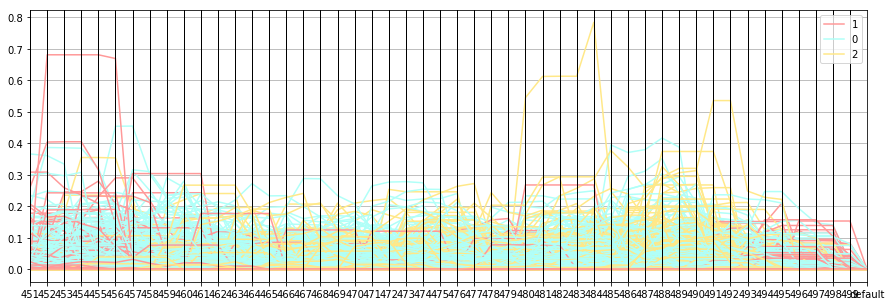

In [98]:
pc = parallel_coordinates(par_cor[par_cor['groups']>-1], 'groups', color=('#FF9999', '#b0fff8', '#FFE888'))

Plot the graphs for last 10 days

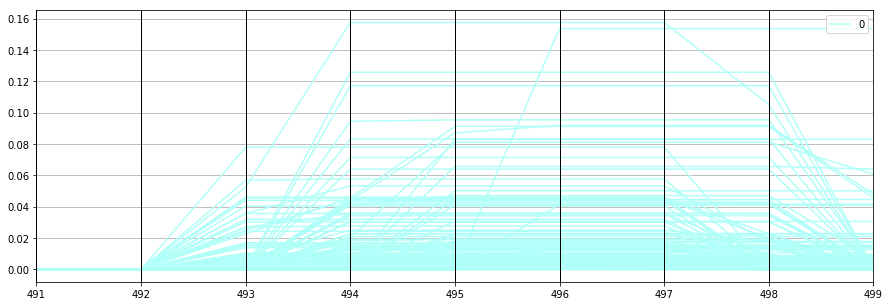

In [127]:
pc = parallel_coordinates(par_cor[par_cor['groups']==0].iloc[:,-10:], 'groups', color=('#b0fff8'))#, '#b0fff8'))

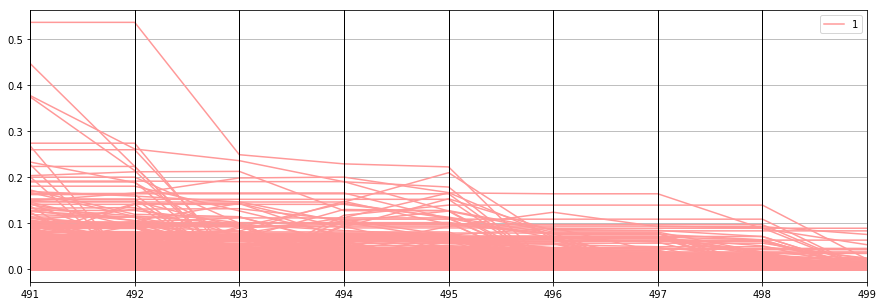

In [128]:
pc = parallel_coordinates(par_cor[par_cor['groups']==1].iloc[:,-10:], 'groups', color=('#FF9999'))#, '#b0fff8'))

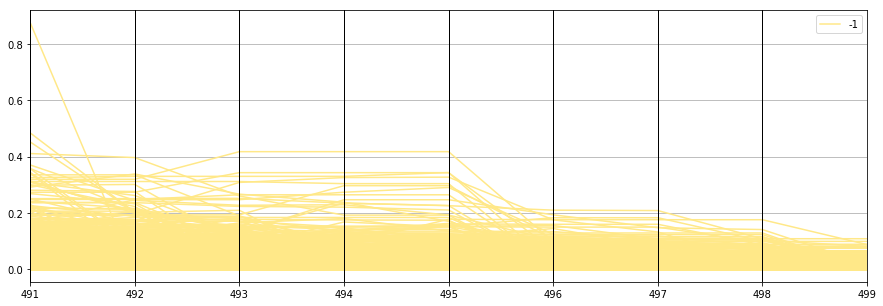

In [129]:
# Plotting noise
pc = parallel_coordinates(par_cor[par_cor['groups']==-1].iloc[:,-10:], 'groups', color=('#FFE888'))#, '#b0fff8'))

let's check if the difference between group 0 and group 1 is statistically significant

In [142]:
f_val, p_val = stats.f_oneway(par_cor[par_cor['groups'] == 0], par_cor[par_cor['groups'] == 1])
print('p val for anova for 25 variables:', p_val)

p val for anova for 25 variables: [4.73766345e-002 1.54882477e-001 2.80371868e-003 5.78452735e-008
 4.41554646e-017 1.71250390e-029 2.06255786e-045 2.72240712e-063
 1.75745978e-075 6.13255551e-099 5.60809546e-133 2.85707328e-138
 3.00130611e-137 3.28113859e-119 1.97994504e-111 2.21950258e-102
 6.46858399e-098 7.46184376e-091 3.29491332e-081 5.12962707e-049
 9.87986254e-030 2.59235693e-011 6.34758282e-006 3.76715368e-003
 8.62396487e-002             nan]


Looking at the above results and the three plots, a clear structure in the data could be seen:<br>
group 0: Unengaged users (the graph is condensed between 0 to 0.02, with some transactions rising to 0.16)<br>
group 1: Engaged users (the graph is condensed between 0 to 0.1, with some transactions rising to 0.5)

Now that we have engaged and unengaged users, let's build a model. It is a typical binary classification problem

## 7) Feature engineering - Feature Selection and FAMD

Feature Selection Factor Map:(what impacts engagement along with their hypothesis)<br>
- user generation (user belonging to gen z will be more likely to be engaged)
- country
- user_settings_crypto_unlocked (H0: users having their crypto setting unlocked are more likely to be engaged)<br>
- plan (H0: users under different plans show different engagement<br>
- num_contact (H0: users having more contacts are more likely to be engaged) <br>
- device type of user (H0: android users are more likely to be engaged) 
- transaction direction (H0: users doing more num inbound transactions are more likely to be engaged)
    - num of transactions in last x days (x=30, 60, 90 => 1M, 2M and 3Month)
- ea_cardholderpresence (H0: True would be more likely to be engaged)
- num notifications sent (H0: more notifications sent will likey attract user to be engaged)
- notification type (H0: different notification type have different impact on user engagement)
- reason
    - num of notifications sent in last x days
- 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email': TO BE CHECKED<br>

In [33]:
users_df = users.set_index(list(users)[0])
print(len(users_df))
users_df = users_df.join(par_cor['groups'])# = pd.merge(users_df, par_cor)
print(len(users_df))

19430
19430


,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,user_created,users_created_year,users_created_month,generations,brand
user_id,,,,,,,,,,,
user_0,PL,1,STANDARD,1.0,1.0,3,2018-01-13,2018,1,genY1,Apple
user_1,GB,0,STANDARD,NaN,NaN,21,2018-01-29,2018,1,genX,Apple
user_2,PL,0,STANDARD,0.0,0.0,21,2018-01-18,2018,1,genY1,Android
user_3,FR,0,STANDARD,1.0,0.0,0,2018-01-15,2018,1,genY2,Apple
user_4,GB,0,STANDARD,NaN,NaN,2,2018-01-11,2018,1,genY1,Apple
user_5,LT,1,STANDARD,NaN,NaN,0,2018-01-04,2018,1,genY2,Apple
user_6,GB,0,STANDARD,NaN,NaN,0,2018-01-24,2018,1,genX,Apple
user_7,RO,0,STANDARD,1.0,1.0,0,2018-01-11,2018,1,genY1,Apple
user_8,GB,1,STANDARD,NaN,NaN,0,2018-01-03,2018,1,genY1,Android


In [16]:
transactions_df = transactions[transactions['transaction_created']>(transactions['transaction_created'].max() - pd.Timedelta(days=25))]
notifications_df = notifications[notifications['notif_created']>(notifications['notif_created'].max() - pd.Timedelta(days=25))]

In [289]:
notifications_df.head(2)

,reason,channel,user_id,notif_created
2052,NO_INITIAL_CARD_USE,EMAIL,user_8643,2019-05-03
2056,NO_INITIAL_CARD_USE,EMAIL,user_5750,2019-05-03


In [34]:
users_df = users_df.drop(columns=['user_created', 'users_created_year', 'users_created_month'])

temp_user = transactions_df.groupby(['user_id','direction'])['transaction_id'].count().unstack()
#INBOUND, OUTBOUND columns showing num transactions in respec direction
users_df = pd.merge(users_df, temp_user, how='outer', on='user_id')

temp_user = transactions_df.groupby(['user_id','ea_cardholderpresence'])['transaction_id'].count().unstack()
users_df = pd.merge(users_df, temp_user, how='outer', on='user_id')

temp_user = notifications_df.groupby(['user_id','channel'])['notif_created'].count().unstack()
users_df = pd.merge(users_df, temp_user, how='outer', on='user_id')

temp_user = notifications_df.groupby(['user_id','reason'])['notif_created'].count().unstack()
users_df = pd.merge(users_df, temp_user, how='outer', on='user_id')

users_df = users_df.rename(columns={'INBOUND': 'num_inbound_trans', 
                              'OUTBOUND': 'num_outbound_trans',
                              'FALSE':'cardholderpresence_F',
                             'TRUE': 'cardholderpresence_T',
                             'UNKNOWN': 'cardholderpresence_NA',
                             'EMAIL':'num_notif_email',
                             'PUSH':'num_notif_push',
                             'JOINING_ANNIVERSARY':'notif_reason_JOINING_ANNIVERSARY',
                             'LOST_CARD_ORDER':'notif_reason_LOST_CARD_ORDER',
                             'MADE_MONEY_REQUEST_NOT_SPLIT_BILL':'notif_reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
                             'NO_INITIAL_CARD_USE':'notif_reason_NO_INITIAL_CARD_USE',
                             'PREMIUM_ENGAGEMENT_FEES_SAVED':'notif_reason_PREMIUM_ENGAGEMENT_FEES_SAVED',
                             'WELCOME_HOME':'notif_reason_WELCOME_HOME'
                             })
print('num features for PCA:', len(list(users_df)))
list(users_df)

num features for PCA: 21


['country',
 'user_settings_crypto_unlocked',
 'plan',
 'attributes_notifications_marketing_push',
 'attributes_notifications_marketing_email',
 'num_contacts',
 'generations',
 'brand',
 'num_inbound_trans',
 'num_outbound_trans',
 'cardholderpresence_F',
 'cardholderpresence_T',
 'cardholderpresence_NA',
 'num_notif_email',
 'num_notif_push',
 'notif_reason_JOINING_ANNIVERSARY',
 'notif_reason_LOST_CARD_ORDER',
 'notif_reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
 'notif_reason_NO_INITIAL_CARD_USE',
 'notif_reason_PREMIUM_ENGAGEMENT_FEES_SAVED',
 'notif_reason_WELCOME_HOME']

In [36]:
#users_df = users_df.iloc[:100,:]

In [19]:
users_df = users_df[users_df['groups'].isin([0,1])]
users_df.shape

(100, 21)

pca - keep orthogonal features

Factor Analysis of Mixed Data

In [358]:
X = users_df.drop('groups', axis='columns').reset_index()
X = users_df.drop('user_id',axis='columns').reset_index()

KeyError: "['user_id'] not found in axis"

In [37]:
# Convert all categorical data to string datatypes
chk = users_df
users_df['generations'] = users_df.generations.astype(str)

users_df.fillna(0, inplace=True)

In [40]:
famd_dict = {}
#X = users_df[users_df.columns[~users_df.columns.isin(['groups'])]]
#X = users_df.drop('groups', axis='columns')
X = users_df

for n in range(1,20):
    famd = prince.FAMD(n_components=n, random_state=42, n_iter=3, copy=True, check_input=True, engine='auto')
    # Remove target variable
    fa = famd.fit(X)#[['country', 'user_settings_crypto_unlocked']])  
    famd_dict[n] = fa.explained_inertia_


C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return cls(data, **kwargs)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1641: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_values, index=self.index, name=self.name)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self.default_fill_value,
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a re

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self.default_fill_value,
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6289: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_data).__finalize__(self)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5884: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> serie

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1641: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_values, index=self.index, name=self.name)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and w

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self.default_fill_value,
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6289: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_data).__finalize__(self)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5884: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> serie

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\__init__.py:1641: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return self._constructor(new_values, index=self.index, name=self.name)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:339: FutureWarning: SparseDataFrame is deprecated and w

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:392: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return cls(data, **kwargs)
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


(0, 19)

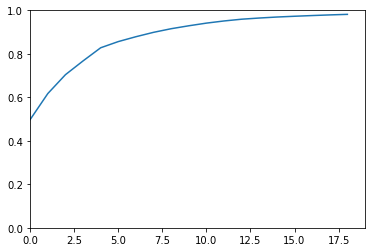

In [54]:
a = []
for k, v in famd_dict.items():
    a.append(sum(v))
plt.plot(a)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 19)

Let num of components be 10

In [97]:
famd = prince.FAMD(n_components=12, random_state=42, n_iter=3, copy=True, check_input=True, engine='auto')
# Remove target variable
fa = famd.fit(users_df)#[['country', 'user_settings_crypto_unlocked']])  
X_famd = famd.row_coordinates(X)

C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\prince\one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
C:\Users\bijno\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.Spar

KeyError: "None of [Index(['brand', 'generations', 'country', 'plan'], dtype='object')] are in the [columns]"

# subplotting
https://www.datacamp.com/community/tutorials/predicting-employee-churn-python

## 8) Modelling

1) test train split on X_famd<br>
2) models<br>
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [68]:
X = X_famd
y = np.random.randint(2, size=100)
                      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
models = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'KNeighborsClassifier',
          'GaussianNB', 'Perceptron', 'SGDClassifier', 'DecisionTreeClassifier']

In [91]:
def get_model_accuracy(model):#, X_train, X_test, y_train, y_test):
    m = eval(model)()
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    #Accuracy of classifier on test dataset
    acc = round(m.score(X_test, y_test) * 100, 2)
    con_mat = confusion_matrix(y_test, y_pred)
    return acc, con_mat, m


In [98]:
acc_best = 0
model_best = None
acc = []
model_fit = []
for m in models:
    a, con, mf = get_model_accuracy(m)
    acc.append(a)
    model_fit.append(mf)
    if a>acc_best:
        acc_best = a
        model_best = m

print(model_best, acc_best)

GaussianNB 50.0


In [94]:
for i in (zip(models, acc, model_fit)):
    print(i)

('LogisticRegression', 30.0, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
('SVC', 26.67, SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))
('RandomForestClassifier', 23.33, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_s

In [99]:
# To get the weights of all the variables
weights = pd.Series(model_fit[0].coef_[0], index=X_famd.columns.values)
weights.sort_values(ascending = False)

0    0.567702
3    0.150891
1    0.122939
7    0.120321
6    0.119894
8    0.116306
5    0.015535
2    0.012110
9   -0.020282
4   -0.022624
dtype: float64

In [84]:
users_df.columns#head(2)
y

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

## 9) Survival Analysis

reduce churn = unengaged user -> engaged user

do this to reduce churn

check if churn is being reduced?